In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [11]:
X_train.size

47040000

In [12]:
X_test.size

7840000

In [13]:
X_train[0].shape

(28, 28)

Hence the image is a 28x28 matrix.
It has 0 value everywhere except for the indexes where the image's part is there.
The values range from (0-255) 

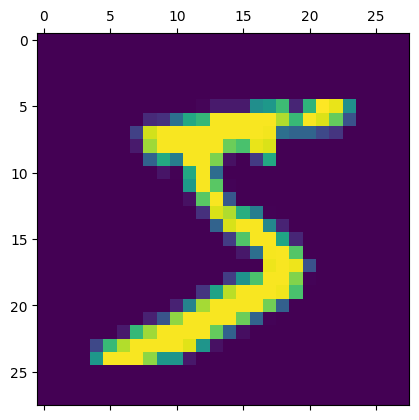

In [14]:
plt.matshow(X_train[0])

In [15]:
y_train[0]

np.uint8(5)

Now we need to convert this 28x28 2D array to a flattened 1D array so that the neurons work properly.

In [16]:
X_train.shape

(60000, 28, 28)

In [20]:
X_test.shape

(10000, 28, 28)

Scalling the X_train and X_test

In [22]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [23]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [24]:
X_train_flattened.shape

(60000, 784)

In [25]:
X_test_flattened.shape

(10000, 784)

Creating the neural network

Input layer -> sigmoid function -> output layer

In [26]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

C:\Users\dhruv\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 911us/step - accuracy: 0.8784 - loss: 0.4702
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 780us/step - accuracy: 0.9154 - loss: 0.3039
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 787us/step - accuracy: 0.9220 - loss: 0.2830
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 811us/step - accuracy: 0.9237 - loss: 0.2729
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 890us/step - accuracy: 0.9256 - loss: 0.2662


In [27]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - accuracy: 0.9247 - loss: 0.2679


[0.2679230570793152, 0.9247000217437744]

Model Evaluation

In [31]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step


In [32]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

Text(0.5, 1.0, 'Confusion Matrix')

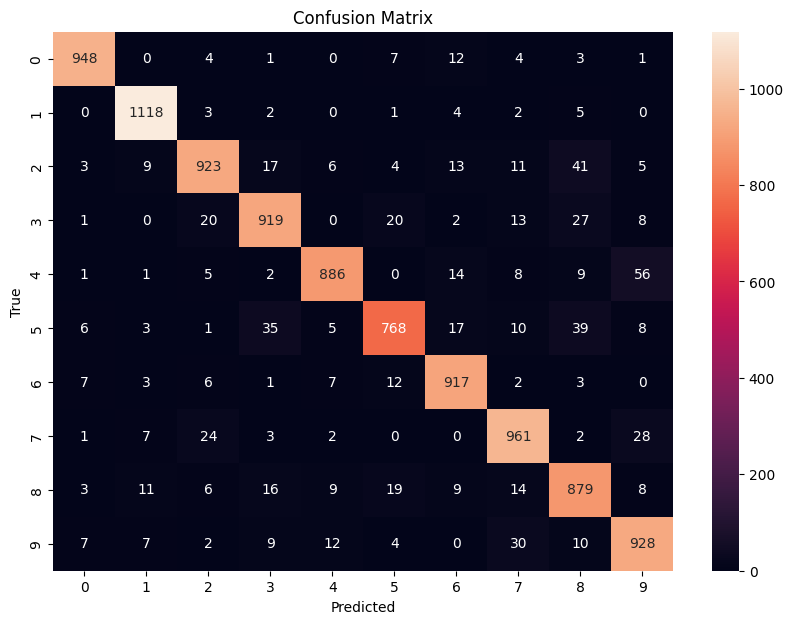

In [33]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

Creating a neural network with 1 hidden layer

Input -> hidden layer(with x number of neurons) -> function -> output layer

In [39]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),  #Here 100 is the number of neurons in the hidden layer
    keras.layers.Dense(10, activation='relu'),
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.1018 - loss: 2.3240
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1119 - loss: 2.2738
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0993 - loss: 2.3013
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0989 - loss: 2.3022
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0989 - loss: 2.3022


In [40]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - accuracy: 0.0982 - loss: 2.3021


[2.3021304607391357, 0.0982000008225441]

So we see a clear jump of accuracy from 0.92 to 0.98 when we add a hidden layer to the neural network.